In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
#Read the dataset

In [79]:
#Testing dataset
test_df=pd.read_csv(r'C:\Users\Lenovo\Downloads\XGBM & LGBM\Titanic_test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
#Traning dataset
train_df=pd.read_csv(r'C:\Users\Lenovo\Downloads\XGBM & LGBM\Titanic_train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**EDA**

In [81]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# check missing values of training dataset

In [87]:
 train_df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
len(train_df)

891

In [89]:
for i in train_df.isna().sum():
    print(i)

0
0
0
0
0
177
0
0
0
0
687
2


In [90]:
for i in train_df.isna().sum():
    print((i/157)*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
112.73885350318471 %
0.0 %
0.0 %
0.0 %
0.0 %
437.57961783439487 %
1.2738853503184715 %


In [91]:
#Histogram on trainind dataset

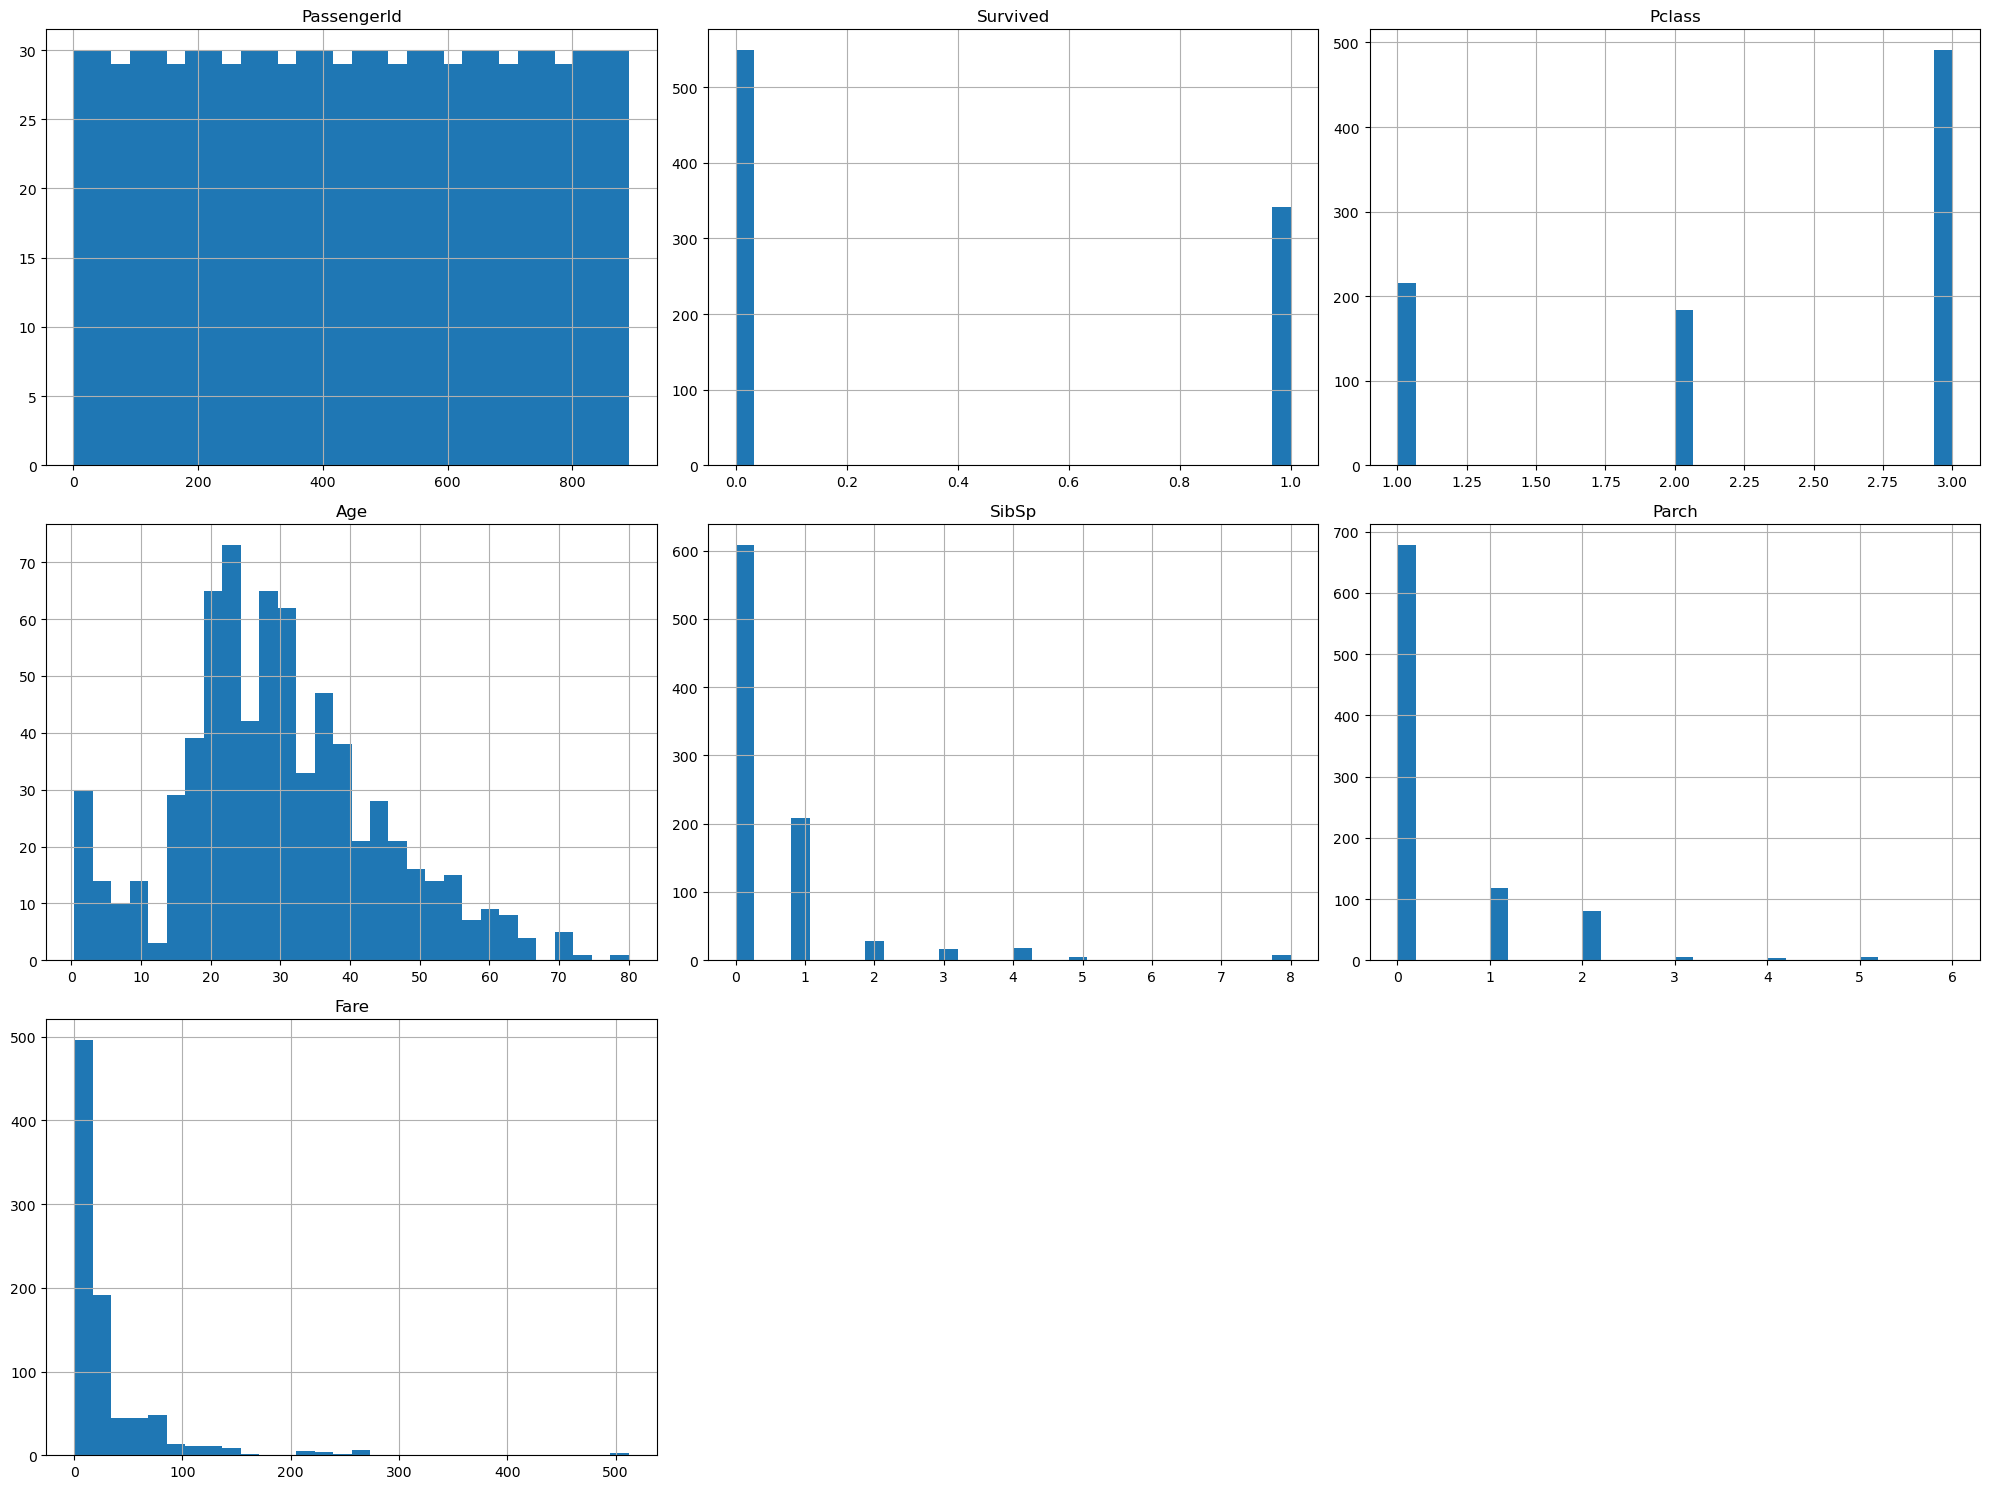

In [92]:
train_df.hist(bins=30, figsize=(20,15))
plt.tight_layout()

In [93]:
#Barplot to visualize relationship 

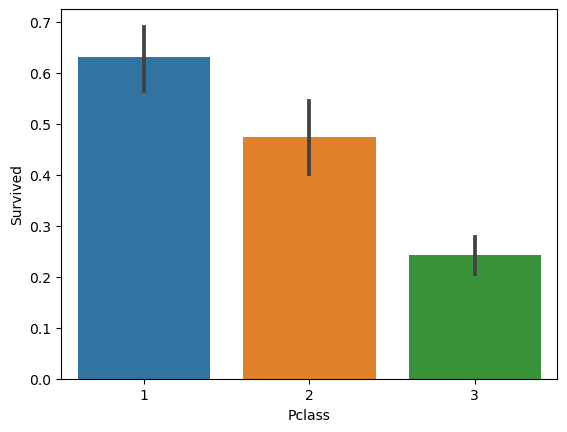

In [94]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

In [95]:
#Relation between the survied and sex column

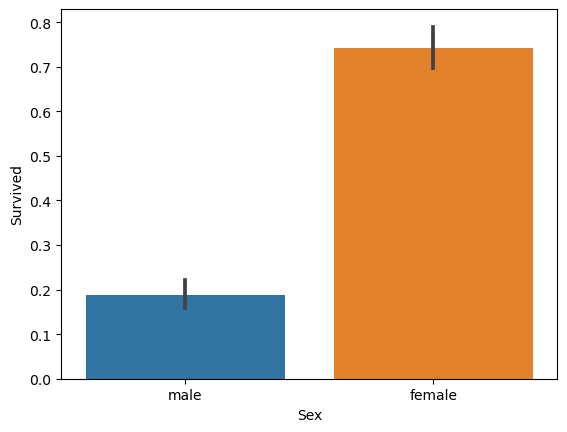

In [96]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

In [97]:
#Boxplot on training dataset

<Axes: >

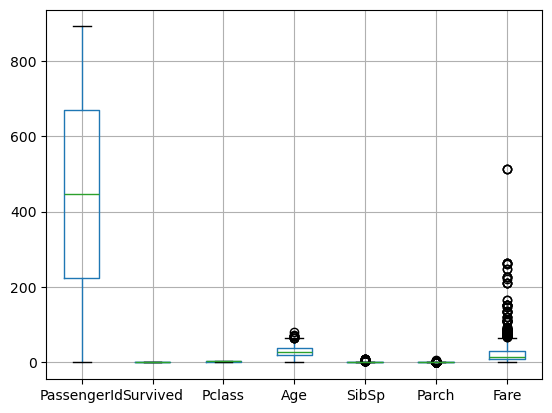

In [98]:
train_df.boxplot()

<Axes: >

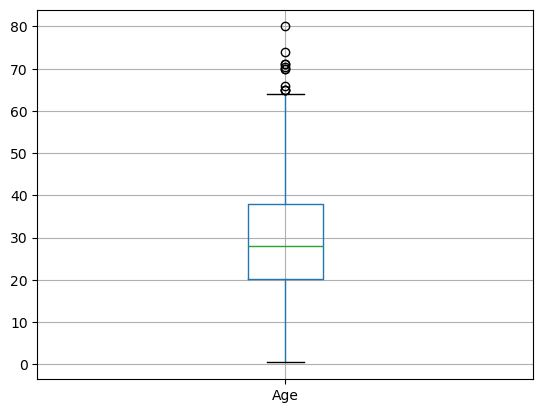

In [99]:
train_df.boxplot(column='Age')

In [100]:
train_df['Age'].median()

28.0

In [101]:
age_median=train_df['Age'].median()
age_median

28.0

In [102]:
train_df['Age'].fillna(age_median, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2756\4030065058.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(age_median, inplace=True)


In [103]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
 #check missing values of testing dataset

In [105]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
len(train_df)

891

In [107]:
for i in test_df.isna().sum():
    print(i)


0
0
0
0
86
0
0
0
1
327
0


In [108]:
for i in test_df.isna().sum():
    print((i/157)*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
54.77707006369427 %
0.0 %
0.0 %
0.0 %
0.6369426751592357 %
208.28025477707007 %
0.0 %


In [109]:
#Histogram on testing dataset

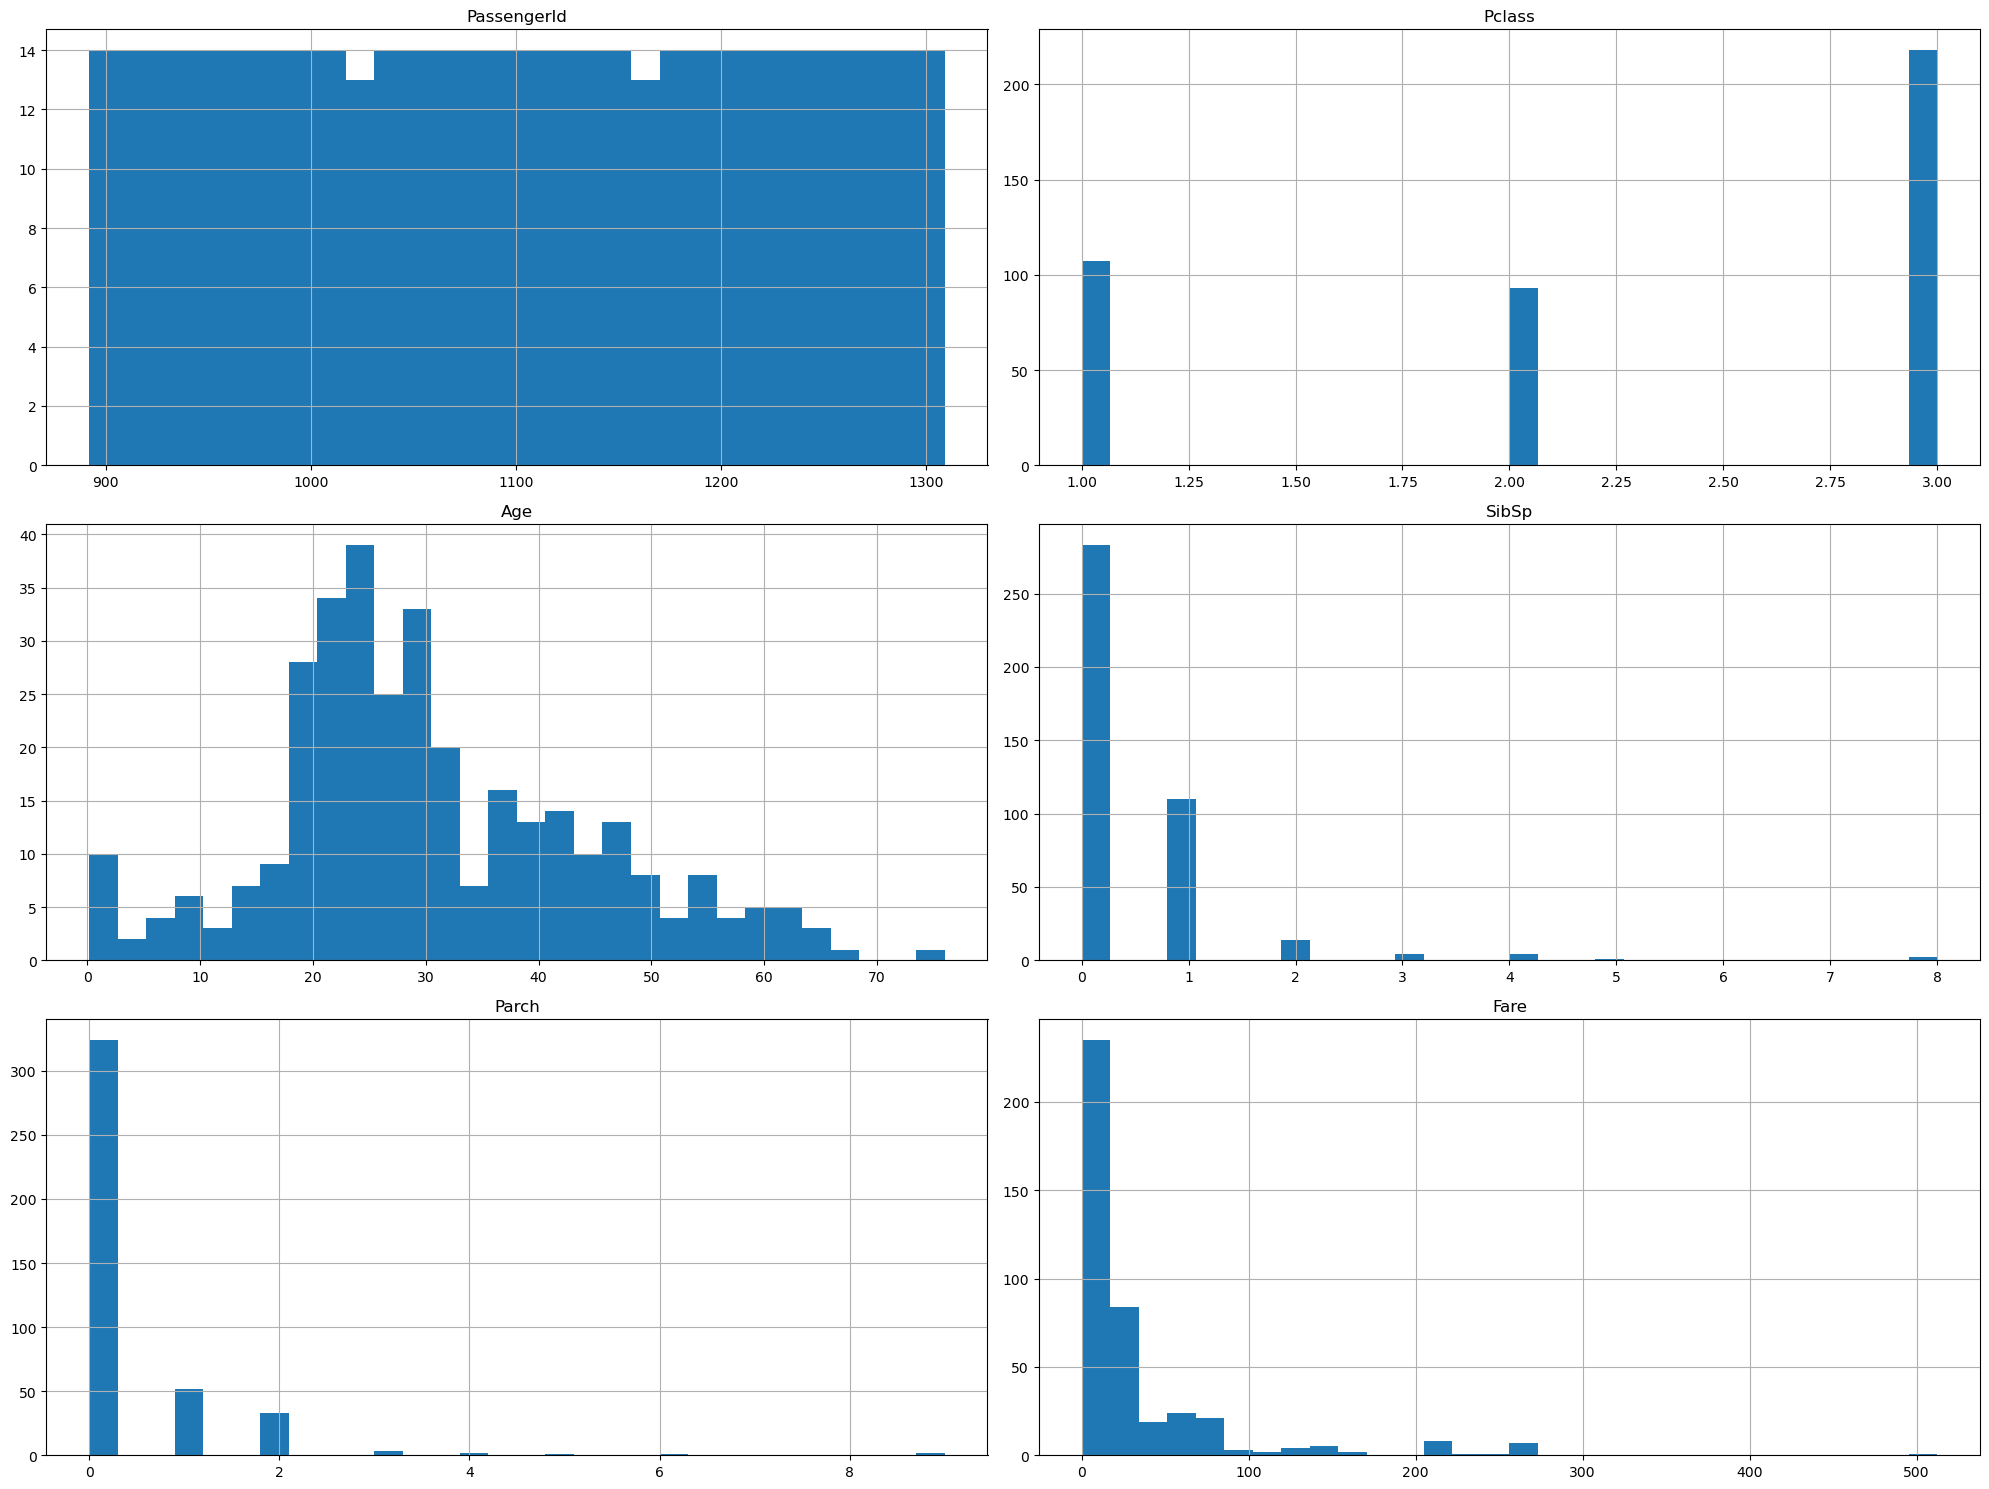

In [110]:
test_df.hist(bins=30, figsize=(20,15))
plt.tight_layout()

In [111]:
#Barplot on trainig dataset

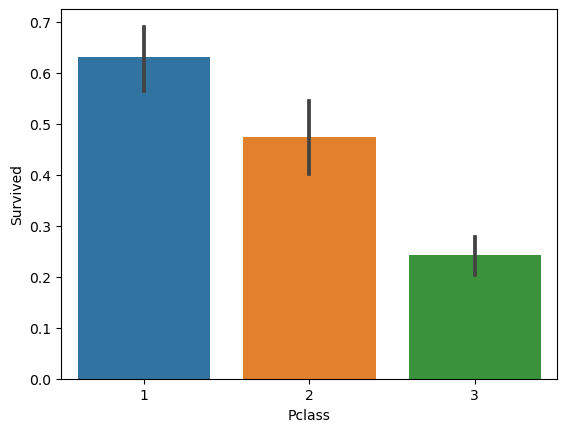

In [112]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

In [113]:
#Boxplot on testing dataset

<Axes: >

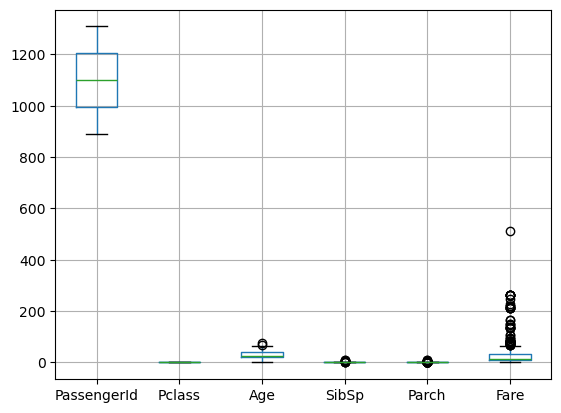

In [114]:
test_df.boxplot()

<Axes: >

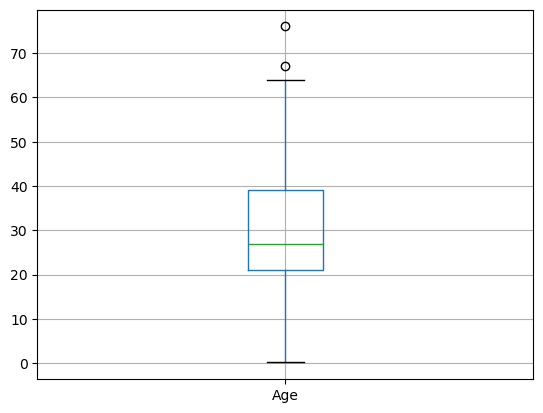

In [115]:
test_df.boxplot(column='Age')

In [116]:
test_df['Age'].median()

27.0

In [117]:
age_median=test_df['Age'].median()
age_median

27.0

In [118]:
test_df['Age'].fillna(age_median, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2756\3094735961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(age_median, inplace=True)


In [119]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [120]:
test_df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [121]:
test_df['Fare'].mean()

35.627188489208635

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [123]:
#Checking for missing values using imputer

In [124]:
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2756\1135199793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [125]:
#Encode the categorical columns

In [126]:
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])


In [127]:
#Drop irrelevant columns

In [128]:
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [129]:
#Split the dataset into train and test part

In [130]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
#Install library 

In [133]:
pip install lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.


**LightGBM Model**

In [134]:
#Import libraries

In [135]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [136]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier()

In [137]:
# Train the model
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [138]:
# Make predictions
lgb_pred = lgb_model.predict(X_test)


In [139]:
# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

In [140]:
print(f"LightGBM Model Performance:\nAccuracy: {lgb_accuracy:.2f}\nPrecision: {lgb_precision:.2f}\nRecall: {lgb_recall:.2f}\nF1 Score: {lgb_f1:.2f}")


LightGBM Model Performance:
Accuracy: 0.81
Precision: 0.78
Recall: 0.76
F1 Score: 0.77


**XGBoost Model**

In [141]:
#Import xgboost library 
import xgboost as xgb

In [142]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [143]:
# Train the model
xgb_model.fit(X_train, y_train)


C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [144]:
# Make predictions
xgb_pred = xgb_model.predict(X_test)


In [145]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

In [146]:
#print the final result
print(f"XGBoost Model Performance:\nAccuracy: {xgb_accuracy:.2f}\nPrecision: {xgb_precision:.2f}\nRecall: {xgb_recall:.2f}\nF1 Score: {xgb_f1:.2f}")

XGBoost Model Performance:
Accuracy: 0.79
Precision: 0.76
Recall: 0.72
F1 Score: 0.74


 **Hyperparameter Tuning and Cross-Validation**

In [148]:
from sklearn.model_selection import RandomizedSearchCV


[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [151]:
# Define parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50, 70],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [152]:
# Random search for LightGBM
lgb_random = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid_lgb, n_iter=10, cv=3, random_state=42)
lgb_random.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [10, 15, 20],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 70]},
                   random_state=42)

In [153]:
print(f"Best Parameters for LightGBM: {lgb_random.best_params_}")

Best Parameters for LightGBM: {'num_leaves': 50, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05}


In [154]:
# Re-train with best parameters
best_lgb_model = lgb_random.best_estimator_
best_lgb_model.fit(X_train, y_train)
best_lgb_pred = best_lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [155]:
# Evaluate the tuned model
best_lgb_accuracy = accuracy_score(y_test, best_lgb_pred)
best_lgb_precision = precision_score(y_test, best_lgb_pred)
best_lgb_recall = recall_score(y_test, best_lgb_pred)
best_lgb_f1 = f1_score(y_test, best_lgb_pred)

In [156]:
print(f"Tuned LightGBM Model Performance:\nAccuracy: {best_lgb_accuracy:.2f}\nPrecision: {best_lgb_precision:.2f}\nRecall: {best_lgb_recall:.2f}\nF1 Score: {best_lgb_f1:.2f}")


Tuned LightGBM Model Performance:
Accuracy: 0.83
Precision: 0.80
Recall: 0.77
F1 Score: 0.79


**Comparative Analysis**

In [149]:
# Print comparison of models
print(f"Comparison of Model Performance:")
print(f"LightGBM Accuracy: {lgb_accuracy:.2f}, Precision: {lgb_precision:.2f}, Recall: {lgb_recall:.2f}, F1 Score: {lgb_f1:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, F1 Score: {xgb_f1:.2f}")
print(f"Tuned LightGBM Accuracy: {best_lgb_accuracy:.2f}, Precision: {best_lgb_precision:.2f}, Recall: {best_lgb_recall:.2f}, F1 Score: {best_lgb_f1:.2f}")


Comparison of Model Performance:
LightGBM Accuracy: 0.81, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
XGBoost Accuracy: 0.79, Precision: 0.76, Recall: 0.72, F1 Score: 0.74
Tuned LightGBM Accuracy: 0.83, Precision: 0.80, Recall: 0.77, F1 Score: 0.79


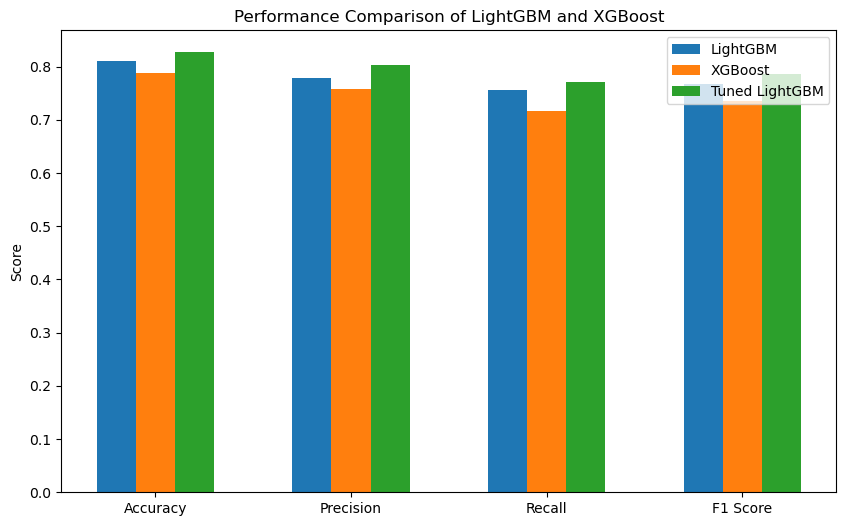

In [150]:
# Visualize comparison using bar plots
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_metrics = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_metrics = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
best_lgb_metrics = [best_lgb_accuracy, best_lgb_precision, best_lgb_recall, best_lgb_f1]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, lgb_metrics, width=0.2, label='LightGBM', align='center')
plt.bar([p + 0.2 for p in x], xgb_metrics, width=0.2, label='XGBoost', align='center')
plt.bar([p + 0.4 for p in x], best_lgb_metrics, width=0.2, label='Tuned LightGBM', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()
